# Histogram Manipulation as Image Enhancer

When we look at the grayscale histogram of an image, we are actually looking at the graylevel probability distribution function (PDF) of that image. Modifying this PDF allows us to modify the quality of the image and enhance hidden features. This process is what we call histogram manipulation.

In [1]:
#import libraries

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters
import pandas as pd
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution

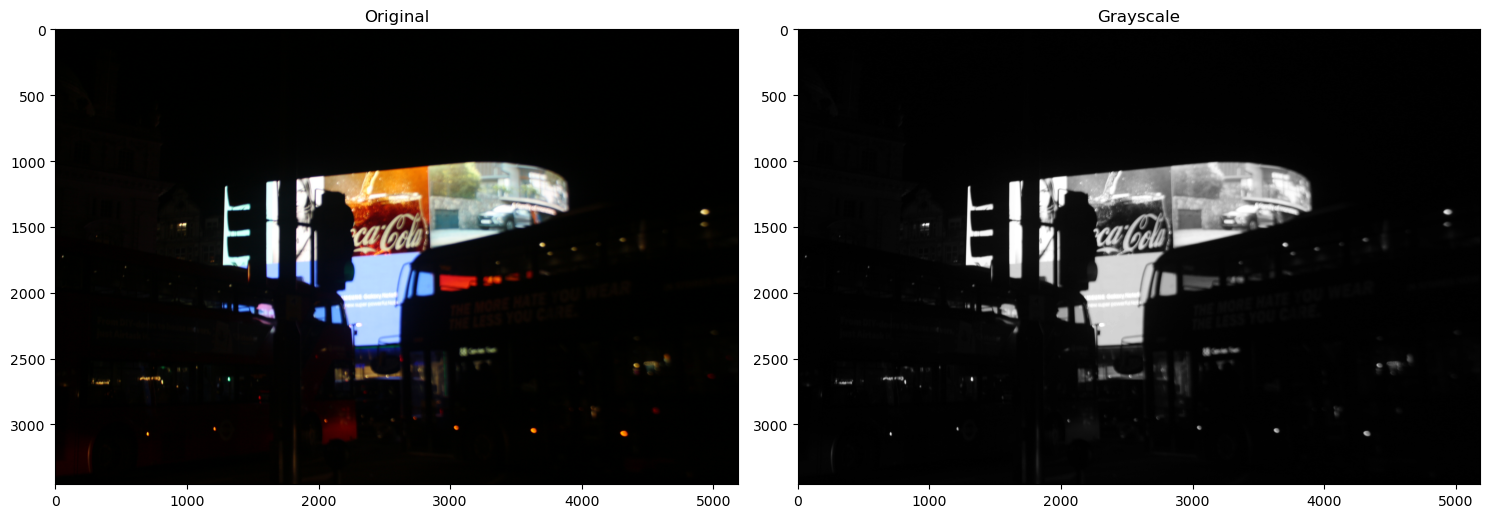

In [2]:
image_dark = imread("london_bash1.JPG")
dark_image_grey = img_as_ubyte(rgb2gray(image_dark))

fig, ax = plt.subplots(1,2, figsize=(15,10), dpi = 100)
ax[0].imshow(image_dark)
ax[0].set_title("Original")
ax[1].imshow(dark_image_grey, cmap='gray')
ax[1].set_title("Grayscale")
fig.tight_layout()

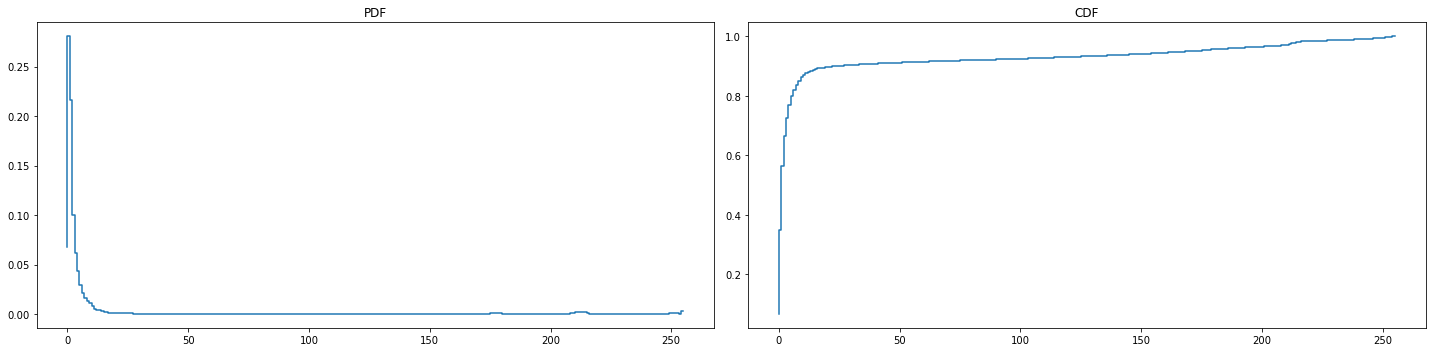

In [3]:
### PDF and CDF
freq, bins = histogram(dark_image_grey)
freq_1, bins_1 = cumulative_distribution(dark_image_grey)
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].step(bins, freq/freq.sum())
ax[0].set_title("PDF")
ax[1].step(bins_1, freq_1)
ax[1].set_title("CDF")
fig.tight_layout()

From the PDF of an image, we seek to obtain a cumulative distribution function (CDF) that we will use to backproject the grayscale values of the PDF.

We see from the shape of the PDF that indeed most of the pixels are dark and the CDF indicates this "polarity" in pixels as seen by the flat line at the middle. One method for us to enhance the image is remapping the CDF with both linear and common non-linear functions (e.g. sigmoid function).

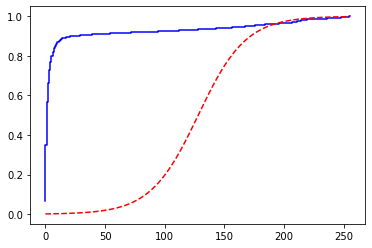

In [4]:
target_bins = np.arange(256)
target_freq = 1/(1+np.exp(-0.05*(target_bins-128)))
dark_image_grey = img_as_ubyte(rgb2gray(image_dark))
freq, bins = cumulative_distribution(dark_image_grey)
plt.step(bins, freq, c='blue', label='Actual CDF')
plt.plot(target_bins, 
         target_freq,
         c='r',
         label='Approximated Normal CDF',
         linestyle = '--')

/Users/albertyumol/opt/anaconda3/lib/python3.8/site-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return convert(image, np.uint8, force_copy)


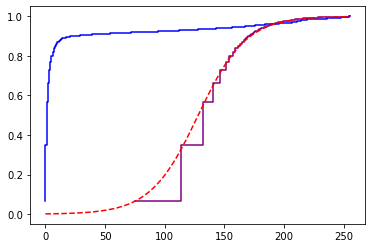

In [5]:
interpolation = np.interp(freq,target_freq,target_bins)
dark_image_eq = img_as_ubyte(interpolation[dark_image_grey].astype(int))
freq_adj, bins_adj = cumulative_distribution(dark_image_eq)

plt.step(bins, freq, c='blue', label='Actual CDF')
plt.step(bins_adj, freq_adj, c='purple', label='Actual CDF')
plt.plot(target_bins, 
         target_freq,
         c='r',
         label='Approximated Normal CDF',
         linestyle = '--')

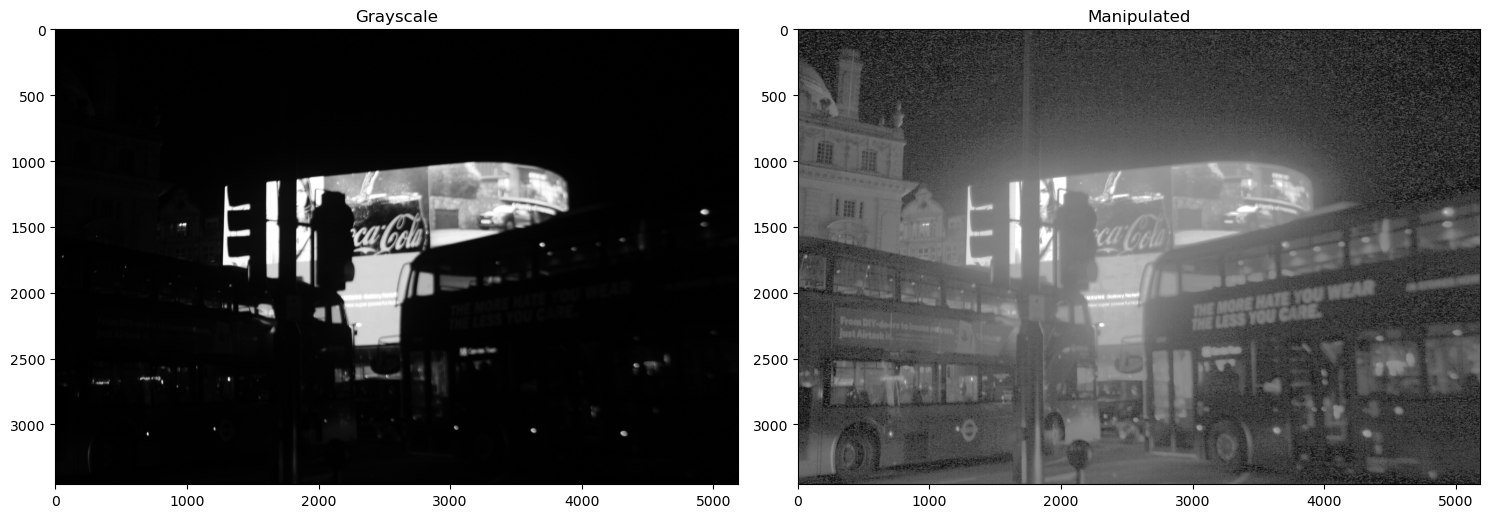

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,10), dpi = 100)
ax[0].imshow(dark_image_grey, cmap='gray')
ax[0].set_title("Grayscale")
ax[1].imshow(dark_image_eq, cmap='gray')
ax[1].set_title("Manipulated")
fig.tight_layout()

We can also expand it by using other functions.

/Users/albertyumol/opt/anaconda3/lib/python3.8/site-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return convert(image, np.uint8, force_copy)
<ipython-input-7-3a8bacfaaf90>:36: RuntimeWarning: divide by zero encountered in log
  target_freq = np.log(target_bins) / max(np.log(target_bins))


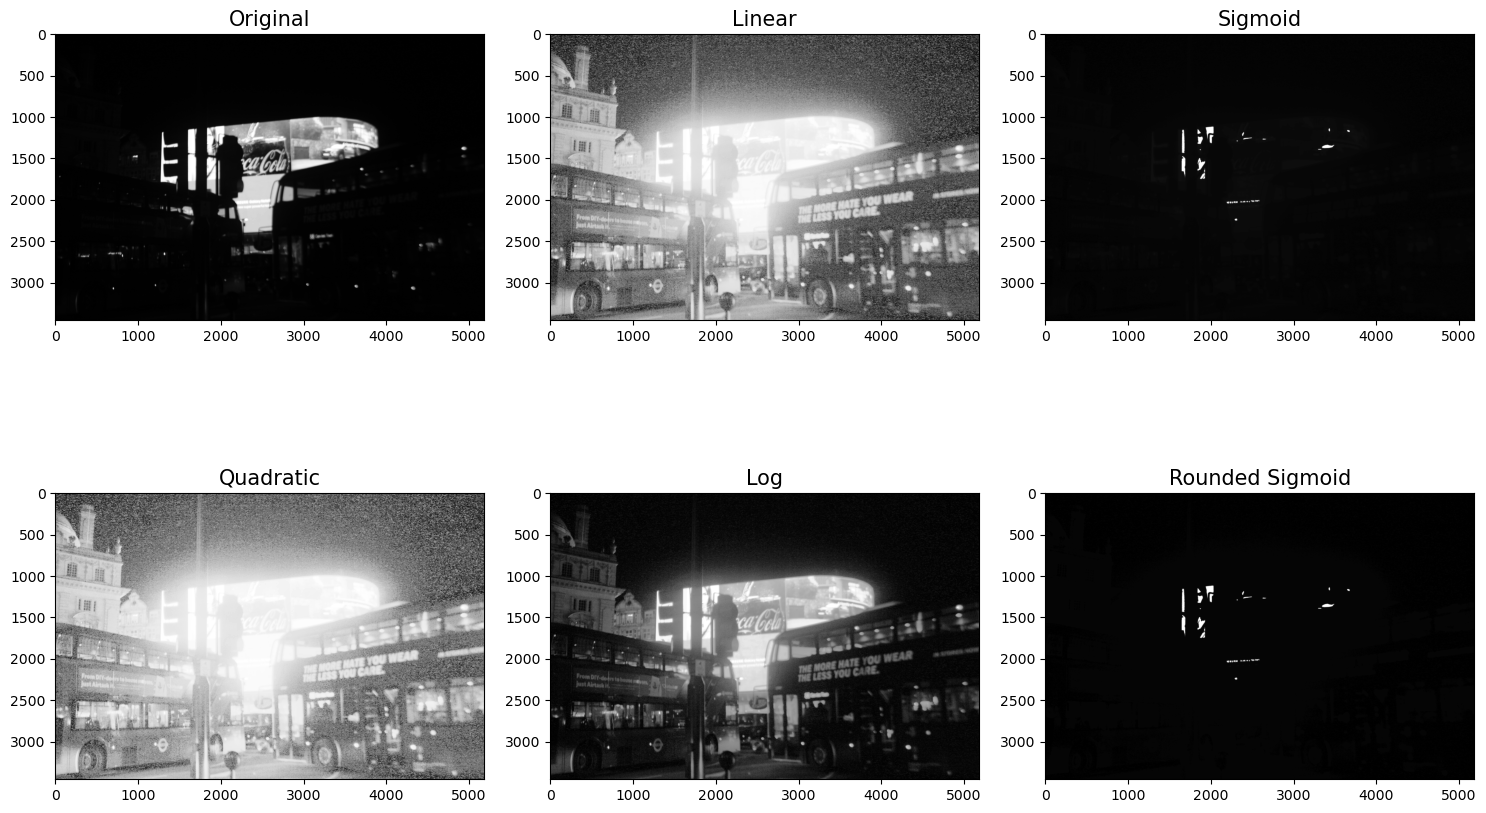

In [7]:
# Handy maths
def logarithm(x):
    return np.log(x)

def sig(x):
    return 1/(1 + np.exp(-1*(x-128)))

def round_sig(x):
    return np.round(sig(x))

def rounded_sig(x):
    container = []
    y = 0
    for i in x:
        if i < 0.25:
            y = 0
        elif i >= 0.25 and i <= 0.75:
            y = 0.5
        else:
            y = 1
        container.append(y)
    return container

dark_image_grey = img_as_ubyte(rgb2gray(image_dark))

#Quadratic Function
target_bins = np.arange(256)
target_freq = ((target_bins**2) / max(target_bins)) / 255
freq, bins = cumulative_distribution(dark_image_grey)
interpolation = np.interp(freq,target_freq,target_bins)
interpolation = np.append(interpolation, [255.])
dark_image_eq = img_as_ubyte(interpolation[dark_image_grey].astype(int))

#Logarithmic Function
target_bins = np.arange(256)
target_freq = np.log(target_bins) / max(np.log(target_bins))
freq, bins = cumulative_distribution(dark_image_grey)
interpolation = np.interp(freq,target_freq,target_bins)
interpolation = np.append(interpolation, [255.])
dark_image_log = img_as_ubyte(interpolation[dark_image_grey].astype(int))

#Rounded Sigmoid Function
target_bins = np.arange(256)
target_freq = rounded_sig(sig(target_bins))
freq, bins = cumulative_distribution(dark_image_grey)
interpolation = np.interp(freq,target_freq,target_bins)
interpolation = np.append(interpolation, [255.])
dark_image_roundsig = img_as_ubyte(interpolation[dark_image_grey].astype(int))

#Sigmoid Function
target_bins = np.arange(256)
target_freq = sig(target_bins) / max(sig(target_bins))
freq, bins = cumulative_distribution(dark_image_grey)
interpolation = np.interp(freq,target_freq,target_bins)
interpolation = np.append(interpolation, [255.])
dark_image_sig = img_as_ubyte(interpolation[dark_image_grey].astype(int))

#Linear Function
target_bins = np.arange(256)
target_freq = target_bins / max(target_bins)
freq, bins = cumulative_distribution(dark_image_grey)
interpolation = np.interp(freq,target_freq,target_bins)
interpolation = np.append(interpolation, [255.])
dark_image_lin = img_as_ubyte(interpolation[dark_image_grey].astype(int))


fig, ax = plt.subplots(2,3, figsize=(15,10), dpi = 100)
ax[0][0].imshow(dark_image_grey, cmap='gray')
ax[0][0].set_title("Original", fontsize = 15)
ax[0][1].imshow(dark_image_lin, cmap='gray')
ax[0][1].set_title("Linear", fontsize = 15)
ax[0][2].imshow(dark_image_sig, cmap='gray')
ax[0][2].set_title("Sigmoid", fontsize = 15)
ax[1][0].imshow(dark_image_eq, cmap='gray')
ax[1][0].set_title("Quadratic", fontsize = 15)
ax[1][1].imshow(dark_image_log, cmap='gray')
ax[1][1].set_title("Log", fontsize = 15)
ax[1][2].imshow(dark_image_roundsig, cmap='gray')
ax[1][2].set_title("Rounded Sigmoid", fontsize = 15)
fig.tight_layout()